In [ ]:
!pip install pandas requests matplotlib seaborn numpy


In [ ]:
# Install if needed (Colab already has these, but safe to run)
!pip install pandas matplotlib seaborn folium plotly

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px

# Style for seaborn
sns.set(style="whitegrid")




In [ ]:
import pandas as pd

# Replace this with your uploaded CSV filename
filename = "/content/dft-road-casualty-statistics-collision-2023.csv"

# Load dataset
df = pd.read_csv(filename)
df.head()


,collision_index,collision_year,collision_ref_no,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,collision_severity,number_of_vehicles,...,carriageway_hazards_historic,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision,collision_injury_based,collision_adjusted_severity_serious,collision_adjusted_severity_slight
0,2023170L30453,2023,170L30453,456584.0,522423.0,-1.125794,54.593835,17,3,3,...,0,13,2,2,2,E01032560,-1,0,0.014215,0.985785
1,2023111293075,2023,111293075,434218.0,514041.0,-1.472891,54.520515,11,3,1,...,0,0,2,1,2,E01012346,3,1,0.000000,1.000000
2,2023111312748,2023,111312748,430616.0,514267.0,-1.528511,54.522776,11,2,2,...,0,0,1,3,2,E01012319,7,1,1.000000,0.000000
3,2023070702777,2023,070702777,360889.0,389063.0,-2.589645,53.396939,7,3,2,...,0,0,1,1,2,E01012483,-1,0,0.148246,0.851754
4,2023070866538,2023,070866538,360571.0,389398.0,-2.594469,53.399926,7,3,2,...,0,0,1,1,2,E01012454,-1,0,0.138077,0.861923


In [ ]:
# See all column names in your dataset
df.columns


Index(['collision_index', 'collision_year', 'collision_ref_no',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'collision_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'local_authority_highway_current',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail_historic', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control_historic',
       'pedestrian_crossing_physical_facilities_historic',
       'pedestrian_crossing', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'special_conditions_at_site',
       'carriageway_hazards_historic', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
 

<class 'pandas.core.frame.DataFrame'>
Index: 104246 entries, 0 to 104257
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   collision_index       104246 non-null  object        
 1   collision_year        104246 non-null  int64         
 2   longitude             104246 non-null  float64       
 3   latitude              104246 non-null  float64       
 4   collision_severity    104246 non-null  object        
 5   number_of_vehicles    104246 non-null  int64         
 6   number_of_casualties  104246 non-null  int64         
 7   date                  104246 non-null  datetime64[ns]
 8   time                  104246 non-null  object        
 9   day_of_week           104246 non-null  int64         
 10  road_type             104246 non-null  object        
 11  speed_limit           104246 non-null  int64         
 12  light_conditions      104246 non-null  object        
 13  weat

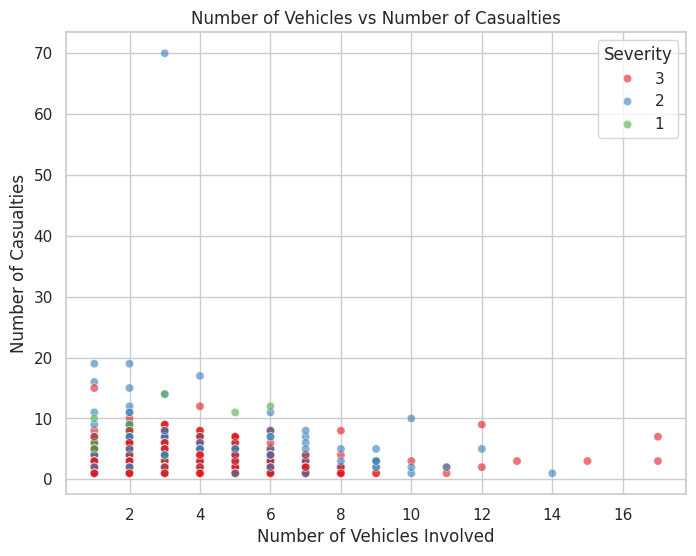

/tmp/ipython-input-1145755618.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='speed_limit', y='number_of_casualties', data=df_clean, palette='cool')


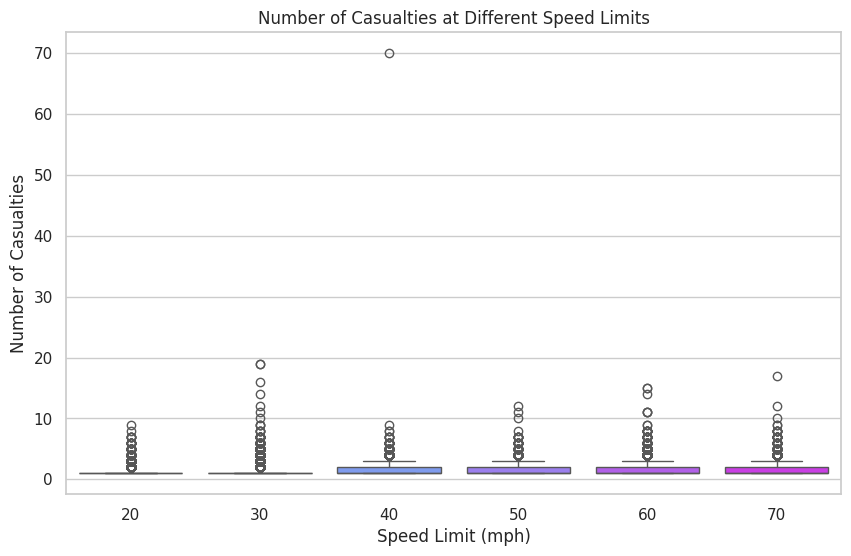

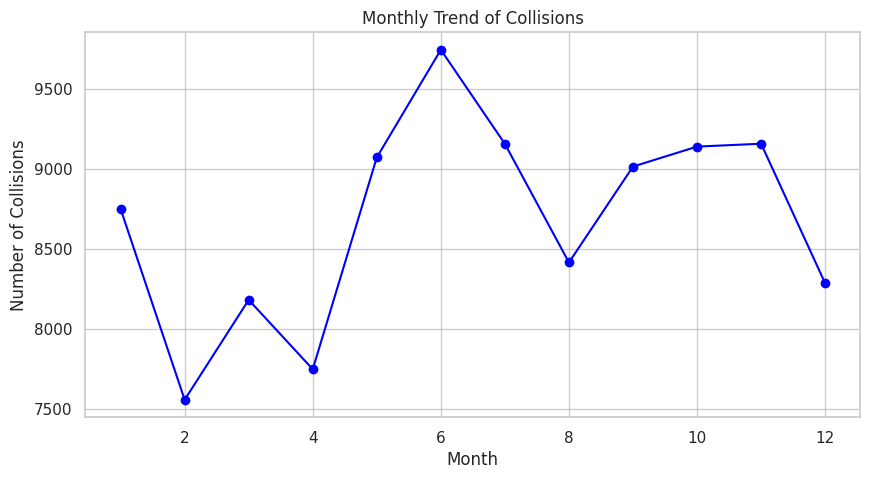

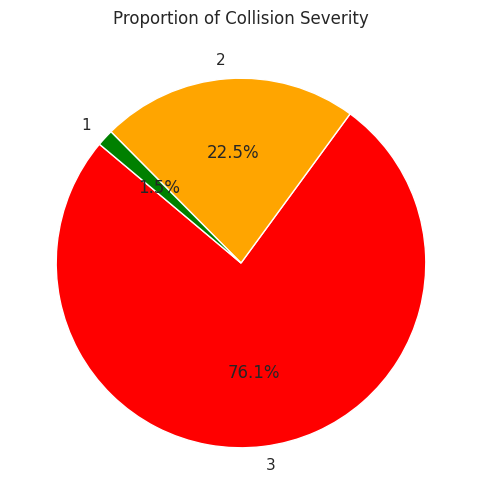

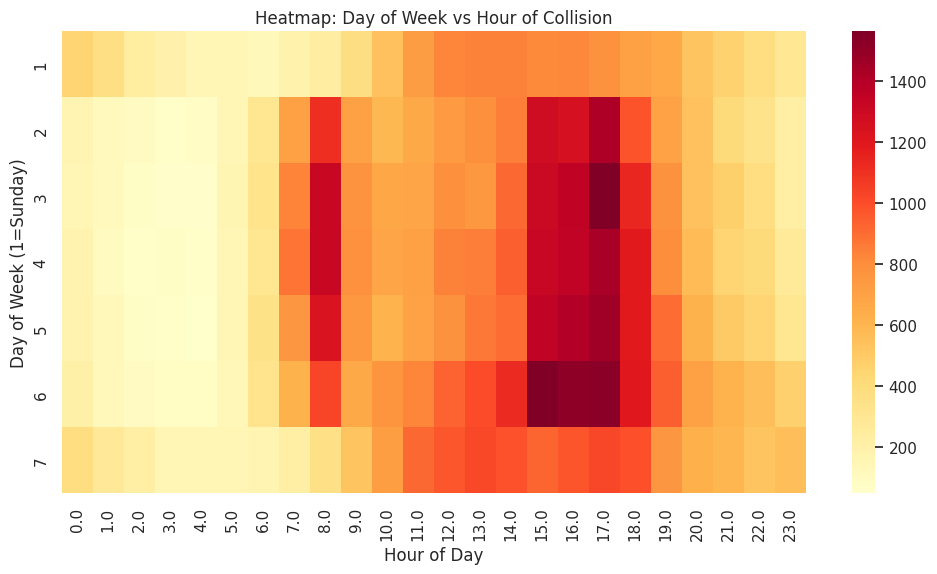

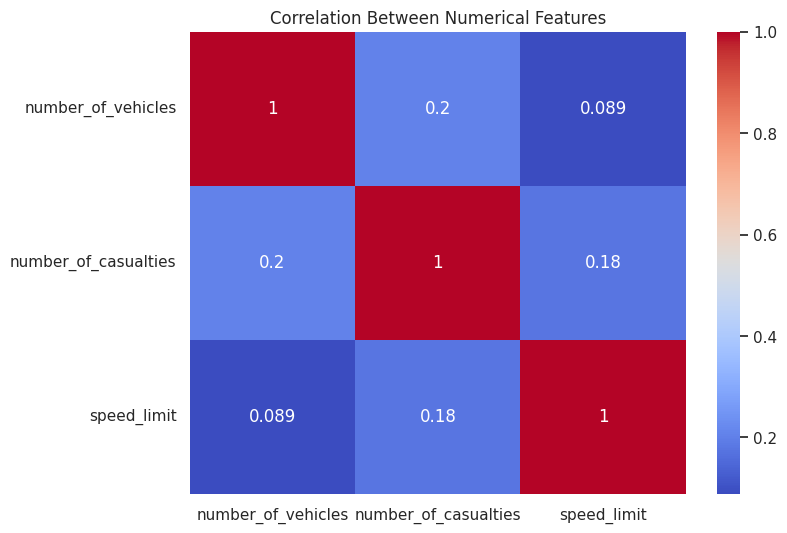

/tmp/ipython-input-1145755618.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roads.index, y=top_roads.values, palette='magma')


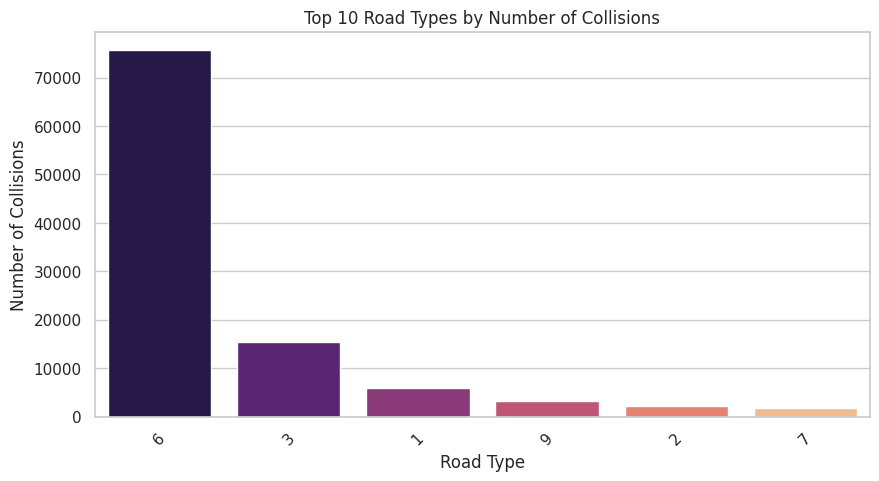

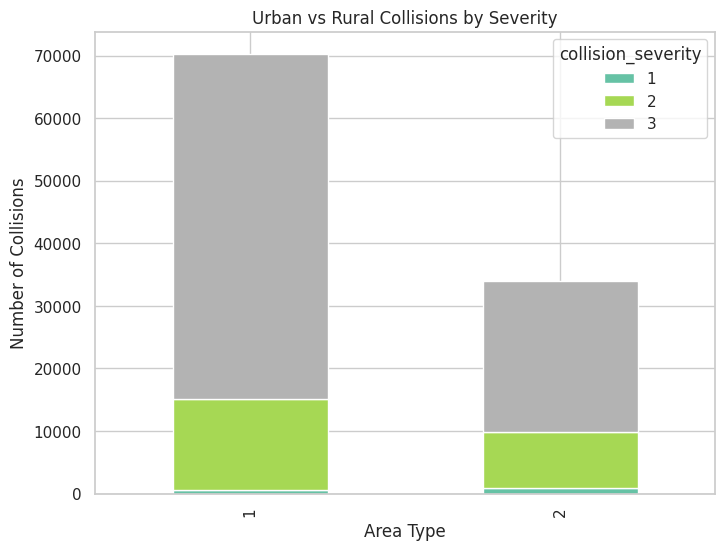

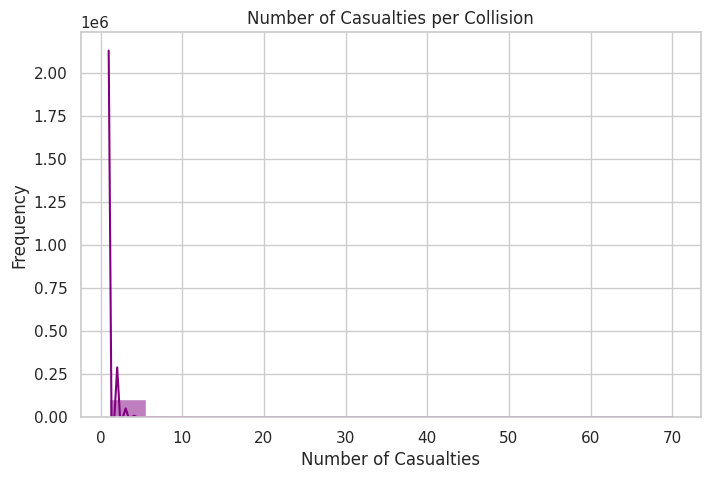

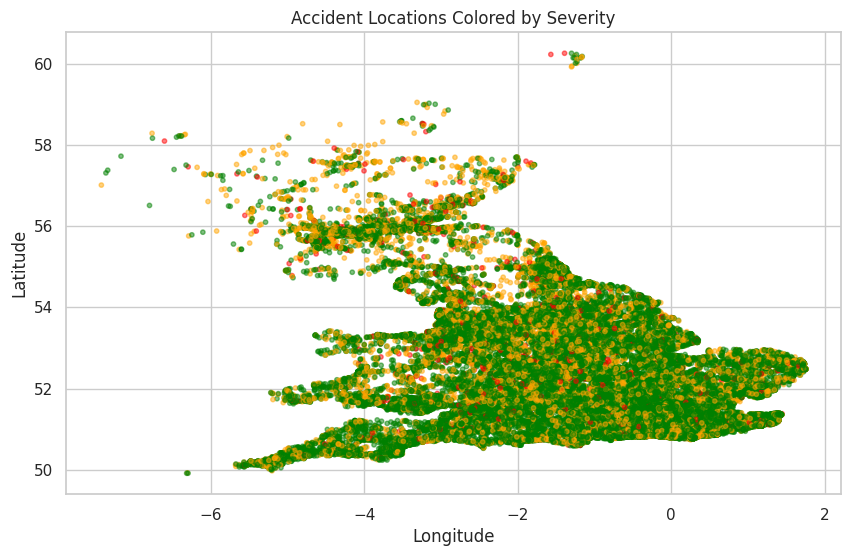

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ===============================================================
# MODULE 1: Traffic Accidents & Road Safety - Full EDA
# ===============================================================

# Step 0: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import folium
from folium.plugins import HeatMap
from google.colab import files

# Step 1: Load the CSV
# Make sure to upload your CSV to Colab first
filename = "dft-road-casualty-statistics-collision-2023.csv"
df = pd.read_csv(filename)

# Step 2: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 3: Select relevant columns
columns_needed = [
    'collision_index', 'collision_year', 'longitude', 'latitude',
    'collision_severity', 'number_of_vehicles', 'number_of_casualties',
    'date', 'time', 'day_of_week', 'road_type', 'speed_limit',
    'light_conditions', 'weather_conditions', 'urban_or_rural_area'
]
columns_existing = [col for col in columns_needed if col in df.columns]
df_clean = df[columns_existing].copy()

# Step 4: Clean the data
df_clean['date'] = pd.to_datetime(df_clean['date'], dayfirst=True, errors='coerce')

# Drop rows missing important info
df_clean = df_clean.dropna(subset=['latitude','longitude','collision_severity'])

# Convert categorical columns to string
categorical_cols = ['collision_severity','road_type','light_conditions',
                    'weather_conditions','urban_or_rural_area']
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str)

# Extract month and hour for EDA
df_clean['month'] = df_clean['date'].dt.month
df_clean['hour'] = df_clean['time'].str.split(':').str[0].astype(float)

df_clean.info()

# ===============================================================
# STEP 5: Exploratory Data Analysis (EDA) - Varied Visualizations
# ===============================================================

# 1️⃣ Scatter Plot: Number of Vehicles vs Number of Casualties
plt.figure(figsize=(8,6))
sns.scatterplot(x='number_of_vehicles', y='number_of_casualties',
                hue='collision_severity', data=df_clean, palette='Set1', alpha=0.6)
plt.title("Number of Vehicles vs Number of Casualties")
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Number of Casualties")
plt.legend(title="Severity")
plt.show()

# 2️⃣ Boxplot: Speed Limit vs Number of Casualties
plt.figure(figsize=(10,6))
sns.boxplot(x='speed_limit', y='number_of_casualties', data=df_clean, palette='cool')
plt.title("Number of Casualties at Different Speed Limits")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Number of Casualties")
plt.show()

# 3️⃣ Line Plot: Monthly Collision Trend
monthly_counts = df_clean.groupby('month')['collision_index'].count()
plt.figure(figsize=(10,5))
monthly_counts.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Trend of Collisions")
plt.xlabel("Month")
plt.ylabel("Number of Collisions")
plt.grid(True)
plt.show()

# 4️⃣ Pie Chart: Collision Severity Proportion
severity_counts = df_clean['collision_severity'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%',
        startangle=140, colors=['red','orange','green'])
plt.title("Proportion of Collision Severity")
plt.show()

# 5️⃣ Heatmap: Day of Week vs Hour of Day Collisions
heat_data = df_clean.groupby(['day_of_week','hour']).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(heat_data, cmap='YlOrRd')
plt.title("Heatmap: Day of Week vs Hour of Collision")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (1=Sunday)")
plt.show()

# 6️⃣ Map with Colored Markers by Severity
map_severity = folium.Map(location=[54.5, -3], zoom_start=6)
colors = {'1':'red','2':'orange','3':'green'}
for index, row in df_clean.head(5000).iterrows():  # limit for performance
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=colors.get(row['collision_severity'], 'blue'),
        fill=True,
        fill_opacity=0.6
    ).add_to(map_severity)
map_severity  # Click the map to view interactive map

# 7️⃣ Correlation Heatmap (Numerical Features)
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['number_of_vehicles','number_of_casualties','speed_limit']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

# 8️⃣ Bar Plot: Top 10 Road Types by Collisions
top_roads = df_clean['road_type'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_roads.index, y=top_roads.values, palette='magma')
plt.title("Top 10 Road Types by Number of Collisions")
plt.xlabel("Road Type")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.show()

# 9️⃣ Stacked Bar: Urban vs Rural by Collision Severity
urban_sev = pd.crosstab(df_clean['urban_or_rural_area'], df_clean['collision_severity'])
urban_sev.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set2')
plt.title("Urban vs Rural Collisions by Severity")
plt.xlabel("Area Type")
plt.ylabel("Number of Collisions")
plt.show()

# 🔟 Histogram: Number of Casualties
plt.figure(figsize=(8,5))
sns.histplot(df_clean['number_of_casualties'], bins=15, kde=True, color='purple')
plt.title("Number of Casualties per Collision")
plt.xlabel("Number of Casualties")
plt.ylabel("Frequency")
plt.show()

# 1️⃣1️⃣ Scatter: Latitude vs Longitude (Accident locations)
plt.figure(figsize=(10,6))
plt.scatter(df_clean['longitude'], df_clean['latitude'], c=df_clean['collision_severity'].map({'1':'red','2':'orange','3':'green'}),
            alpha=0.5, s=10)
plt.title("Accident Locations Colored by Severity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ===============================================================
# STEP 6: Save Cleaned CSV
# ===============================================================
df_clean.to_csv("road_accidents_cleaned.csv", index=False)
files.download("road_accidents_cleaned.csv")  # Download to your PC
